In [1]:
import pandas as pd
import numpy as np
import datetime
import time

In [2]:
chunksize = 1000000
count = 0

for chunk in pd.read_csv("flights.csv", chunksize=chunksize):
    jfk = chunk.loc[chunk['ORIGIN_AIRPORT'] == "JFK"]
    
    jfk.to_csv("data/data" + str(count) +".csv", index = False)
    count += 1
    # late = jfk.loc[jfk['DEPARTURE_DELAY'] > 15]

/Users/thuranaing/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
weather = pd.read_csv("jfk_weather_cleaned.csv")
filtered2015 = weather[weather['DATE'].apply(lambda x: x.startswith('2015'))]
nyd = weather[weather['DATE'].apply(lambda x: x.startswith('2016-01-01 00:00:00'))]
filtered2015 = filtered2015.append(nyd)
# filtered2015.to_csv("2015weather.csv")

In [4]:
filtered2015

,DATE,HOURLYVISIBILITY,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYStationPressure,HOURLYSeaLevelPressure,HOURLYPrecip,HOURLYAltimeterSetting,HOURLYWindDirectionSin,HOURLYWindDirectionCos,HOURLYPressureTendencyIncr,HOURLYPressureTendencyDecr,HOURLYPressureTendencyCons
43823,2015-01-01 00:00:00,10.0,30.0,24.0,11.0,45.0,15.0,30.18,30.20,0.0,30.20,-0.984808,-0.173648,0,1,0
43824,2015-01-01 01:00:00,10.0,29.0,24.0,11.0,47.0,13.0,30.16,30.18,0.0,30.18,-0.984808,-0.173648,0,1,0
43825,2015-01-01 02:00:00,10.0,29.0,24.0,13.0,51.0,14.0,30.14,30.17,0.0,30.16,-0.939693,-0.342020,0,1,0
43826,2015-01-01 03:00:00,10.0,29.0,24.0,11.0,47.0,14.0,30.14,30.16,0.0,30.16,-0.939693,-0.342020,0,1,0
43827,2015-01-01 04:00:00,10.0,29.0,23.0,8.0,41.0,17.0,30.13,30.15,0.0,30.15,-0.984808,-0.173648,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52579,2015-12-31 20:00:00,10.0,47.0,40.0,30.0,52.0,10.0,30.08,30.10,0.0,30.10,-0.766044,0.642788,1,0,0
52580,2015-12-31 21:00:00,10.0,46.0,39.0,29.0,51.0,16.0,30.08,30.10,0.0,30.10,-0.766044,0.642788,1,0,0
52581,2015-12-31 22:00:00,10.0,45.0,38.0,28.0,52.0,17.0,30.08,30.10,0.0,30.10,-0.642788,0.766044,1,0,0
52582,2015-12-31 23:00:00,10.0,44.0,37.0,27.0,51.0,15.0,30.07,30.09,0.0,30.09,-0.766044,0.642788,1,0,0


In [5]:
filtered2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8761 entries, 43823 to 52583
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DATE                        8761 non-null   object 
 1   HOURLYVISIBILITY            8761 non-null   float64
 2   HOURLYDRYBULBTEMPF          8761 non-null   float64
 3   HOURLYWETBULBTEMPF          8761 non-null   float64
 4   HOURLYDewPointTempF         8761 non-null   float64
 5   HOURLYRelativeHumidity      8761 non-null   float64
 6   HOURLYWindSpeed             8761 non-null   float64
 7   HOURLYStationPressure       8761 non-null   float64
 8   HOURLYSeaLevelPressure      8761 non-null   float64
 9   HOURLYPrecip                8761 non-null   float64
 10  HOURLYAltimeterSetting      8761 non-null   float64
 11  HOURLYWindDirectionSin      8761 non-null   float64
 12  HOURLYWindDirectionCos      8761 non-null   float64
 13  HOURLYPressureTendencyIncr  

In [6]:
data = pd.read_csv("data/data0.csv")
data

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,B6,2023,N324JB,JFK,SJU,535,...,1039.0,19.0,0,0,NaN,0.0,0.0,19.0,0.0,0.0
1,2015,1,1,4,AA,2299,N3LLAA,JFK,MIA,545,...,959.0,69.0,0,0,NaN,14.0,0.0,55.0,0.0,0.0
2,2015,1,1,4,B6,939,N794JB,JFK,BQN,545,...,1007.0,-19.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,B6,353,N570JB,JFK,PBI,600,...,836.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,B6,583,N531JB,JFK,MCO,600,...,832.0,-19.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18007,2015,3,7,6,B6,615,N942JB,JFK,SFO,904,...,1258.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
18008,2015,3,7,6,B6,208,N198JB,JFK,PWM,907,...,1006.0,-23.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
18009,2015,3,7,6,B6,1634,N328JB,JFK,BTV,910,...,1009.0,-24.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
18010,2015,3,7,6,DL,2474,N698DL,JFK,SJU,910,...,1504.0,58.0,0,0,NaN,0.0,0.0,58.0,0.0,0.0


In [7]:
data.loc[data['DEPARTURE_DELAY'] >= 15, 'DELAYED'] = 1
data.loc[data['DEPARTURE_DELAY'] < 15, 'DELAYED'] = 0

In [8]:
data['CANCELLED'].unique()
data = data.loc[data['CANCELLED'] == 0].copy()
data['CANCELLED'].unique()
data = data.drop(['CANCELLED', 'CANCELLATION_REASON'], axis = 1)

In [9]:
data = data.drop(['DEPARTURE_DELAY', 'ARRIVAL_DELAY','AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'], axis = 1).copy()

In [10]:
data = data.drop(["ORIGIN_AIRPORT"], axis = 1).copy()

In [11]:
print(data.isnull().sum())
data = data.dropna().copy()
print(data.isnull().sum())

YEAR                    0
MONTH                   0
DAY                     0
DAY_OF_WEEK             0
AIRLINE                 0
FLIGHT_NUMBER           0
TAIL_NUMBER             0
DESTINATION_AIRPORT     0
SCHEDULED_DEPARTURE     0
DEPARTURE_TIME          0
TAXI_OUT                0
WHEELS_OFF              0
SCHEDULED_TIME          0
ELAPSED_TIME           59
AIR_TIME               59
DISTANCE                0
WHEELS_ON               1
TAXI_IN                 1
SCHEDULED_ARRIVAL       0
ARRIVAL_TIME            1
DIVERTED                0
DELAYED                 0
dtype: int64
YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON      

In [12]:
data["SCHEDULED_DEPARTURE_FORMAT"] = pd.to_datetime(data["SCHEDULED_DEPARTURE"], format='%H%M')
data["SCHEDULED_DEPARTURE_FORMAT"] = data["SCHEDULED_DEPARTURE_FORMAT"].dt.time

In [13]:
data

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,DIVERTED,DELAYED,SCHEDULED_DEPARTURE_FORMAT
0,2015,1,1,4,B6,2023,N324JB,SJU,535,618.0,...,201.0,184.0,1598,1035.0,4.0,1020,1039.0,0,1.0,05:35:00
1,2015,1,1,4,AA,2299,N3LLAA,MIA,545,640.0,...,199.0,152.0,1089,929.0,30.0,850,959.0,0,1.0,05:45:00
2,2015,1,1,4,B6,939,N794JB,BQN,545,545.0,...,202.0,180.0,1576,1002.0,5.0,1026,1007.0,0,0.0,05:45:00
3,2015,1,1,4,B6,353,N570JB,PBI,600,554.0,...,162.0,142.0,1028,832.0,4.0,858,836.0,0,0.0,06:00:00
4,2015,1,1,4,B6,583,N531JB,MCO,600,557.0,...,155.0,135.0,944,828.0,4.0,851,832.0,0,0.0,06:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18007,2015,3,7,6,B6,615,N942JB,SFO,904,932.0,...,386.0,351.0,2586,1252.0,6.0,1250,1258.0,0,1.0,09:04:00
18008,2015,3,7,6,B6,208,N198JB,PWM,907,903.0,...,63.0,49.0,273,1003.0,3.0,1029,1006.0,0,0.0,09:07:00
18009,2015,3,7,6,B6,1634,N328JB,BTV,910,902.0,...,67.0,48.0,266,1007.0,2.0,1033,1009.0,0,0.0,09:10:00
18010,2015,3,7,6,DL,2474,N698DL,SJU,910,1022.0,...,222.0,194.0,1598,1501.0,3.0,1406,1504.0,0,1.0,09:10:00


In [14]:
def createJoin(row):
    year = row["YEAR"]
    month = row["MONTH"]
    day = row["DAY"]
    hour = (row["SCHEDULED_DEPARTURE_FORMAT"].hour)
    minute = (row["SCHEDULED_DEPARTURE_FORMAT"].minute)
    month30 = [4, 6, 9 , 11]
    
    # for december 31
    if (month == 12 and day == 31 and hour == 23 and minute > 30):
        return datetime.datetime(year+1, 1, 1, 0, 0)
    
    # for febuary 28th
    elif (day == 28 and month == 2 and hour == 23 and minute > 30):
        return datetime.datetime(year, month+1, 1, 0,0)
    
    # for 30th day of 30day months
    elif (day == 30 and (month in month30) and hour == 23 and minute > 30 ):
        return datetime.datetime(year, month+1,1,0,0)
    
    # for every other end of month
    elif (day == 31 and hour == 23 and minute> 30):
        return datetime.datetime(year, month+1,1,0,0)
    
    # for every end of day at 11.30
    elif (hour == 23 and minute > 30):
        return datetime.datetime(year, month,day+1,0,0)
    
    # for every hour
    elif (minute > 30):     
        return datetime.datetime(year, month,day,hour+1,0)
    
    elif (minute <= 30):
        return datetime.datetime(year, month,day,hour,0)
    

In [15]:
new_column = data.apply(lambda row: createJoin(row), axis=1)
data.insert(0, "DATETIME", new_column)
data = data.drop(["SCHEDULED_DEPARTURE_FORMAT"], axis = 1).copy()

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16780 entries, 0 to 18011
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATETIME             16780 non-null  datetime64[ns]
 1   YEAR                 16780 non-null  int64         
 2   MONTH                16780 non-null  int64         
 3   DAY                  16780 non-null  int64         
 4   DAY_OF_WEEK          16780 non-null  int64         
 5   AIRLINE              16780 non-null  object        
 6   FLIGHT_NUMBER        16780 non-null  int64         
 7   TAIL_NUMBER          16780 non-null  object        
 8   DESTINATION_AIRPORT  16780 non-null  object        
 9   SCHEDULED_DEPARTURE  16780 non-null  int64         
 10  DEPARTURE_TIME       16780 non-null  float64       
 11  TAXI_OUT             16780 non-null  float64       
 12  WHEELS_OFF           16780 non-null  float64       
 13  SCHEDULED_TIME       16780 non-

In [17]:
data_with_weather = data.set_index('DATETIME').join(filtered2015.set_index('DATE')).copy()

In [18]:
data_with_weather.reset_index(inplace = True)

In [19]:
data_with_weather.rename({'index': 'DATETIME'}, axis=1, inplace=True)

In [20]:
data_with_weather.nunique()
data_with_weather = data_with_weather.drop(['YEAR', 'DIVERTED'], axis = 1)
data_with_weather.nunique()

DATETIME                      1218
MONTH                            3
DAY                             31
DAY_OF_WEEK                      7
AIRLINE                          8
FLIGHT_NUMBER                  479
TAIL_NUMBER                   1369
DESTINATION_AIRPORT             59
SCHEDULED_DEPARTURE            416
DEPARTURE_TIME                1207
TAXI_OUT                       138
WHEELS_OFF                    1219
SCHEDULED_TIME                 282
ELAPSED_TIME                   488
AIR_TIME                       427
DISTANCE                        58
WHEELS_ON                     1295
TAXI_IN                         58
SCHEDULED_ARRIVAL              738
ARRIVAL_TIME                  1300
DELAYED                          2
HOURLYVISIBILITY                16
HOURLYDRYBULBTEMPF              51
HOURLYWETBULBTEMPF              52
HOURLYDewPointTempF             68
HOURLYRelativeHumidity          71
HOURLYWindSpeed                 31
HOURLYStationPressure          140
HOURLYSeaLevelPressu

In [21]:
data_with_weather.to_csv("cleaned_data0.csv")

In [22]:
data_with_weather

,DATETIME,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,HOURLYWindSpeed,HOURLYStationPressure,HOURLYSeaLevelPressure,HOURLYPrecip,HOURLYAltimeterSetting,HOURLYWindDirectionSin,HOURLYWindDirectionCos,HOURLYPressureTendencyIncr,HOURLYPressureTendencyDecr,HOURLYPressureTendencyCons
0,2015-01-01 06:00:00,1,1,4,B6,2023,N324JB,SJU,535,618.0,...,16.0,30.16,30.18,0.0,30.18,-0.984808,-0.173648,0,1,0
1,2015-01-01 06:00:00,1,1,4,AA,2299,N3LLAA,MIA,545,640.0,...,16.0,30.16,30.18,0.0,30.18,-0.984808,-0.173648,0,1,0
2,2015-01-01 06:00:00,1,1,4,B6,939,N794JB,BQN,545,545.0,...,16.0,30.16,30.18,0.0,30.18,-0.984808,-0.173648,0,1,0
3,2015-01-01 06:00:00,1,1,4,B6,353,N570JB,PBI,600,554.0,...,16.0,30.16,30.18,0.0,30.18,-0.984808,-0.173648,0,1,0
4,2015-01-01 06:00:00,1,1,4,B6,583,N531JB,MCO,600,557.0,...,16.0,30.16,30.18,0.0,30.18,-0.984808,-0.173648,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16775,2015-03-07 09:00:00,3,7,6,B6,615,N942JB,SFO,904,932.0,...,10.0,30.27,30.29,0.0,30.29,-0.939693,-0.342020,0,1,0
16776,2015-03-07 09:00:00,3,7,6,B6,208,N198JB,PWM,907,903.0,...,10.0,30.27,30.29,0.0,30.29,-0.939693,-0.342020,0,1,0
16777,2015-03-07 09:00:00,3,7,6,B6,1634,N328JB,BTV,910,902.0,...,10.0,30.27,30.29,0.0,30.29,-0.939693,-0.342020,0,1,0
16778,2015-03-07 09:00:00,3,7,6,DL,2474,N698DL,SJU,910,1022.0,...,10.0,30.27,30.29,0.0,30.29,-0.939693,-0.342020,0,1,0


In [23]:
features = data_with_weather.drop(['DELAYED', 'DATETIME','DESTINATION_AIRPORT','TAIL_NUMBER', 'AIRLINE', 'FLIGHT_NUMBER'], axis = 1)
target = data_with_weather['DELAYED']

In [24]:
features

,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,...,HOURLYWindSpeed,HOURLYStationPressure,HOURLYSeaLevelPressure,HOURLYPrecip,HOURLYAltimeterSetting,HOURLYWindDirectionSin,HOURLYWindDirectionCos,HOURLYPressureTendencyIncr,HOURLYPressureTendencyDecr,HOURLYPressureTendencyCons
0,1,1,4,535,618.0,13.0,631.0,225.0,201.0,184.0,...,16.0,30.16,30.18,0.0,30.18,-0.984808,-0.173648,0,1,0
1,1,1,4,545,640.0,17.0,657.0,185.0,199.0,152.0,...,16.0,30.16,30.18,0.0,30.18,-0.984808,-0.173648,0,1,0
2,1,1,4,545,545.0,17.0,602.0,221.0,202.0,180.0,...,16.0,30.16,30.18,0.0,30.18,-0.984808,-0.173648,0,1,0
3,1,1,4,600,554.0,16.0,610.0,178.0,162.0,142.0,...,16.0,30.16,30.18,0.0,30.18,-0.984808,-0.173648,0,1,0
4,1,1,4,600,557.0,16.0,613.0,171.0,155.0,135.0,...,16.0,30.16,30.18,0.0,30.18,-0.984808,-0.173648,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16775,3,7,6,904,932.0,29.0,1001.0,406.0,386.0,351.0,...,10.0,30.27,30.29,0.0,30.29,-0.939693,-0.342020,0,1,0
16776,3,7,6,907,903.0,11.0,914.0,82.0,63.0,49.0,...,10.0,30.27,30.29,0.0,30.29,-0.939693,-0.342020,0,1,0
16777,3,7,6,910,902.0,17.0,919.0,83.0,67.0,48.0,...,10.0,30.27,30.29,0.0,30.29,-0.939693,-0.342020,0,1,0
16778,3,7,6,910,1022.0,25.0,1047.0,236.0,222.0,194.0,...,10.0,30.27,30.29,0.0,30.29,-0.939693,-0.342020,0,1,0


In [25]:
col = features.columns

In [26]:
target

0        1.0
1        1.0
2        0.0
3        0.0
4        0.0
        ... 
16775    1.0
16776    0.0
16777    0.0
16778    1.0
16779    1.0
Name: DELAYED, Length: 16780, dtype: float64

# ---------------------------------

In [27]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score, 
    recall_score, 
    f1_score,
    log_loss
)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25)

# scale the features 
X_train = StandardScaler().fit_transform(X_train.values)
X_test = StandardScaler().fit_transform(X_test.values)

model = LogisticRegression(max_iter = 1000000)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
results = model.predict(X_test)

In [30]:
cm = confusion_matrix(y_test,results)
ps = precision_score(y_test, results)
rs = recall_score(y_test, results)
f1 = f1_score(y_test, results)
accuracy = accuracy_score(y_test, results)
error_score = 1 - accuracy

# accuracy score
print('Accuracy: ', accuracy)

# error score
print('Error: ', error_score)

# confusion matrix
print('Confusion Matrix: ')
print(cm)

# precision score
print('Precision: ', ps)

# recall score
print('recall: ',rs)

# f1 score
print('f1: ', f1)    


Accuracy:  0.7573301549463647
Error:  0.2426698450536353
Confusion Matrix: 
[[2871  150]
 [ 868  306]]
Precision:  0.6710526315789473
recall:  0.2606473594548552
f1:  0.3754601226993865


In [31]:
coefficients = pd.DataFrame(model.coef_)
coefficients.columns = col
coefficients = coefficients.transpose()
coefficients

,0
MONTH,0.215812
DAY,-0.144484
DAY_OF_WEEK,0.055375
SCHEDULED_DEPARTURE,-0.092483
DEPARTURE_TIME,0.587919
TAXI_OUT,0.216139
WHEELS_OFF,0.163486
SCHEDULED_TIME,1.428365
ELAPSED_TIME,-0.253151
AIR_TIME,-0.283760


In [32]:
# thresholds values
thresholds = [0.25, 0.5, 0.75, 0.9]

# function to test all thresholds
def thresholds_metrics(thresholds):
    model = LogisticRegression(max_iter=5000)
    model.fit(X_train, y_train)
    
    for i in thresholds:
        
        # if prediction proba is greater than threshold, set as 1, otherwise 0
        predictions = np.where(model.predict_proba(X_test)[:,1] > i, 1, 0)
        print('Thresholds: ', i)
        
        accuracy_rate = accuracy_score(y_test, predictions)
        print('Accuracy: ' + str(accuracy_rate))
        
        ps = precision_score(y_test, predictions)
        print('Precision: ', ps)
    
        rs = recall_score(y_test, predictions)
        print('recall: ',rs)
        print('--------------')

In [33]:
thresholds_metrics(thresholds)

Thresholds:  0.25
Accuracy: 0.6379022646007151
Precision:  0.41548260656540914
recall:  0.7223168654173765
--------------
Thresholds:  0.5
Accuracy: 0.7573301549463647
Precision:  0.6710526315789473
recall:  0.2606473594548552
--------------
Thresholds:  0.75
Accuracy: 0.7384982121573301
Precision:  0.8598130841121495
recall:  0.07836456558773425
--------------
Thresholds:  0.9
Accuracy: 0.7249106078665077
Precision:  0.8846153846153846
recall:  0.019591141396933562
--------------


# ---------------------------------

In [34]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
# sklearn Knn
def kNN(x_train, y_train, x_test, y_test):
    for i in range(1,10):
        print('k = ',i)
        knn = KNeighborsClassifier(n_neighbors = i)
        knn.fit(x_train,y_train)
        predictions = knn.predict(x_test)
        
        accuracy = accuracy_score(y_test, predictions)
        
        print("Accuracy: ", accuracy)
        print("error:", 1-accuracy)

In [36]:
kNN(X_train, y_train, X_test, y_test)

k =  1
Accuracy:  0.732300357568534
error: 0.26769964243146604
k =  2
Accuracy:  0.7651966626936829
error: 0.23480333730631708
k =  3
Accuracy:  0.7620977353992848
error: 0.23790226460071517
k =  4
Accuracy:  0.7735399284862932
error: 0.22646007151370684
k =  5
Accuracy:  0.768533969010727
error: 0.231466030989273
k =  6
Accuracy:  0.7730631704410011
error: 0.22693682955899885
k =  7
Accuracy:  0.7718712753277711
error: 0.2281287246722289
k =  8
Accuracy:  0.7744934445768772
error: 0.2255065554231228
k =  9
Accuracy:  0.7766388557806913
error: 0.22336114421930875


In [37]:
# run all four classifier
def four_classifiers(x_train, y_train, x_test, y_test):
    
    print('Logistic Regression')
    lgr = LogisticRegression(max_iter=1000)
    lgr.fit(x_train,y_train)
    log_predict = pd.DataFrame(lgr.predict(x_test))
    accuracy = accuracy_score(y_test, log_predict)
        
    print("Accuracy: ", accuracy)
    print("error:", 1-accuracy)
    
    print('LDA')
    lda = LinearDiscriminantAnalysis()
    lda.fit(x_train,y_train)
    lda_predict = lda.predict(x_test)
    accuracy = accuracy_score(y_test, lda_predict)
        
    print("Accuracy: ", accuracy)
    print("error:", 1-accuracy)
    
    
    print('KNearestNeighbor')
    knn = KNeighborsClassifier(n_neighbors = 8)
    knn.fit(x_train,y_train)
    knn_predict = knn.predict(x_test)
    accuracy = accuracy_score(y_test, knn_predict)
        
    print("Accuracy: ", accuracy)
    print("error:", 1-accuracy)
    
    print('Naive Bayes')
    nb = GaussianNB()
    nb.fit(x_train, y_train)
    naives_predict = nb.predict(x_test)
    accuracy = accuracy_score(y_test, naives_predict)
        
    print("Accuracy: ", accuracy)
    print("error:", 1-accuracy)
    
    return [lgr, lda, knn ,nb]


In [38]:
predictors = four_classifiers(X_train, y_train, X_test, y_test)

Logistic Regression
Accuracy:  0.7573301549463647
error: 0.2426698450536353
LDA
Accuracy:  0.7575685339690107
error: 0.2424314660309893
KNearestNeighbor
Accuracy:  0.7744934445768772
error: 0.2255065554231228
Naive Bayes
Accuracy:  0.7170441001191895
error: 0.2829558998808105


In [39]:
# produce roc graphs and prints auc
def roc_auc(predictors):
    predictor_names = ['LogisticRegression','LDA', 'KNN', 'NB']
    for i in range(4):
        pred = predictors[i]
        plot_roc_curve(pred,x_test,y_test)
        auc = roc_auc_score(y_test, pred.predict(x_test))
        print(predictor_names[i], 'AUC scores is ',auc)

In [40]:
# produce roc graphs and prints auc
def roc_auc(predictors):
    predictor_names = ['LogisticRegression','LDA', 'KNN', 'NB']
    for i in range(4):
        pred = predictors[i]
        
        probabilities = pred.predict_proba(X_test)
        probabilities = probabilities[:, 1]
        r_auc = roc_auc_score(y_test, probabilities)
        print("AUC=", r_auc)

        plot_roc_curve(pred,X_test,y_test)
        auc = roc_auc_score(y_test, probabilities)
        print(predictor_names[i], 'AUC scores is ',auc)

AUC= 0.7277918849710178
LogisticRegression AUC scores is  0.7277918849710178
AUC= 0.723859164158669
LDA AUC scores is  0.723859164158669
AUC= 0.7584060920518325
KNN AUC scores is  0.7584060920518325
AUC= 0.711681771043919
NB AUC scores is  0.711681771043919


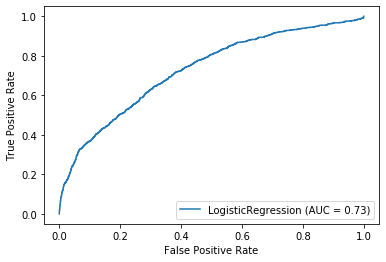

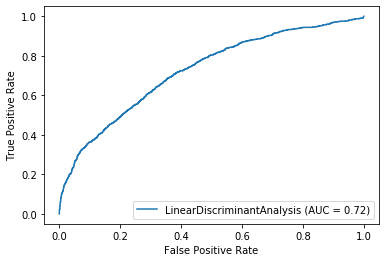

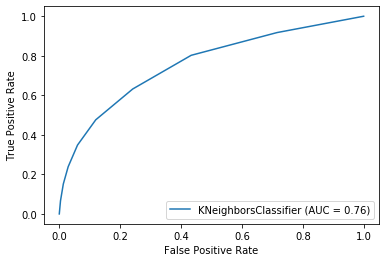

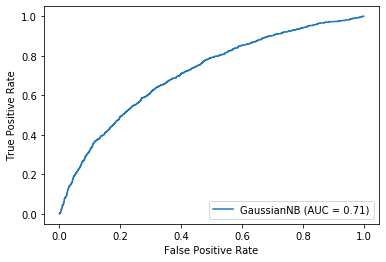

In [41]:
roc_auc(predictors)

# -----------------------------

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

import matplotlib.pyplot as plt
%matplotlib inline

-------------------------------------------
----- DECISION TREE W/ VARIOUS DEPTHS -----
-------------------------------------------


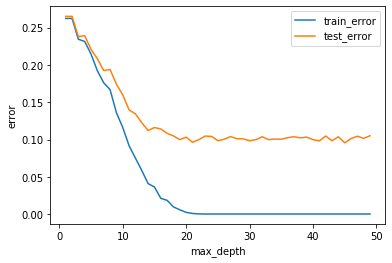

In [43]:
print("-------------------------------------------")
print("----- DECISION TREE W/ VARIOUS DEPTHS -----")
print("-------------------------------------------")

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
    
train_error = []
test_error = []
max_depths = []

for depth in range(1, 50):
    
    max_depths.append(depth)
    
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    
    # ON TRAINING
    predict_label = dt.predict(X_train)

    c_matrix = confusion_matrix(y_train, predict_label)

    tp = c_matrix[1][1]
    tn = c_matrix[0][0]
    
    accuracy = (tp + tn) / len(predict_label)
    error = 1-accuracy
    
    train_error.append(error)
    
    # ON TESTING
    predict_label = dt.predict(X_test)
    
    c_matrix = confusion_matrix(y_test, predict_label)

    tp = c_matrix[1][1]
    tn = c_matrix[0][0]
    
    accuracy = (tp + tn) / len(predict_label)
    error = 1-accuracy
    
    test_error.append(error)
    

df = pd.DataFrame({'train_error':pd.Series(train_error), 
                   'test_error':pd.Series(test_error),
                   'max_depth':pd.Series(max_depths)})

plt.plot('max_depth','train_error', data=df, label='train_error')
plt.plot('max_depth','test_error', data=df, label='test_error')
plt.xlabel('max_depth')
plt.ylabel('error')
plt.legend()

In [44]:
print("-----------------------------------------")
print("----- DECISION TREE W/ MAX DEPTH 15 -----")
print("-----------------------------------------")

dt = DecisionTreeClassifier(max_depth = 15)
dt.fit(X_train, y_train)

# METRIC REPORTING

# ON TRAIN
print("\nFor Training Set:")
predict_label = dt.predict(X_train)

c_matrix = confusion_matrix(y_train, predict_label)

tp = c_matrix[1][1]
fp = c_matrix[0][1]
tn = c_matrix[0][0]
fn = c_matrix[1][0]

# metric calculation
accuracy = (tp + tn) / len(predict_label)
precision = (tp) / (tp + fp)
recall = (tp) / (tp + fn)
# avoid a division by 0 error
if precision+recall > 0:
    f1 = 2 * (precision*recall) / (precision+recall)
else:
    f1 = 0

print("\nThe accuracy is: {}".format(accuracy))
print("The error is: {}".format(1-accuracy))
print("The precision is: {}".format(precision))
print("The recall is: {}".format(recall))
print("The F1 score is: {}".format(f1))


# ON TEST
print("\nFor Testing Set:")
predict_label = dt.predict(X_test)

c_matrix = confusion_matrix(y_test, predict_label)

tp = c_matrix[1][1]
fp = c_matrix[0][1]
tn = c_matrix[0][0]
fn = c_matrix[1][0]

# metric calculation
accuracy = (tp + tn) / len(predict_label)
precision = (tp) / (tp + fp)
recall = (tp) / (tp + fn)
# avoid a division by 0 error
if precision+recall > 0:
    f1 = 2 * (precision*recall) / (precision+recall)
else:
    f1 = 0

print("\nThe accuracy is: {}".format(accuracy))
print("The error is: {}".format(1-accuracy))
print("The precision is: {}".format(precision))
print("The recall is: {}".format(recall))
print("The F1 score is: {}\n".format(f1))

-----------------------------------------
----- DECISION TREE W/ MAX DEPTH 15 -----
-----------------------------------------

For Training Set:

The accuracy is: 0.9637663885578069
The error is: 0.03623361144219306
The precision is: 0.9807044410413476
The recall is: 0.8906815020862309
The F1 score is: 0.933527696793003

For Testing Set:

The accuracy is: 0.8831942789034565
The error is: 0.11680572109654352
The precision is: 0.8202247191011236
The recall is: 0.7461669505962522
The F1 score is: 0.7814451382694024



-------------------------
----- RANDOM FOREST -----
-------------------------

Estimators: 10

For Training Set:

The accuracy is: 0.9919745729042511
The error is: 0.008025427095748938
The precision is: 0.9985730593607306
The recall is: 0.9732962447844228
The F1 score is: 0.985772644034371

For Testing Set:

The accuracy is: 0.86507747318236
The error is: 0.13492252681764005
The precision is: 0.8848101265822785
The recall is: 0.5954003407155025
The F1 score is: 0.7118126272912424

Estimators: 50

For Training Set:

The accuracy is: 0.9999205403257847
The error is: 7.945967421529865e-05
The precision is: 1.0
The recall is: 0.9997218358831711
The F1 score is: 0.9998608985950758

For Testing Set:

The accuracy is: 0.8717520858164481
The error is: 0.12824791418355186
The precision is: 0.9005037783375315
The recall is: 0.6090289608177172
The F1 score is: 0.7266260162601625

Estimators: 100

For Training Set:

The accuracy is: 1.0
The error is: 0.0
The precision is: 1.0
The recall is: 1.0
Th

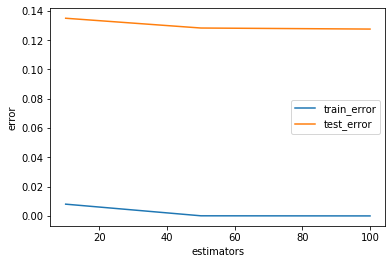

In [45]:
print("-------------------------")
print("----- RANDOM FOREST -----")
print("-------------------------\n")

train_error = []
test_error = []

estimators = [10, 50, 100]

for estimator in estimators:
    
    print("Estimators: {}".format(estimator))
    rf = RandomForestClassifier(n_estimators=estimator)
    rf = rf.fit(X_train, y_train)
    
    # METRIC REPORTING
    
    # ON TRAIN
    print("\nFor Training Set:")
    predict_label = rf.predict(X_train)

    c_matrix = confusion_matrix(y_train, predict_label)

    tp = c_matrix[1][1]
    fp = c_matrix[0][1]
    tn = c_matrix[0][0]
    fn = c_matrix[1][0]

    # metric calculation
    accuracy = (tp + tn) / len(predict_label)
    error = 1-accuracy
    precision = (tp) / (tp + fp)
    recall = (tp) / (tp + fn)
    # avoid a division by 0 error
    if precision+recall > 0:
        f1 = 2 * (precision*recall) / (precision+recall)
    else:
        f1 = 0
        
    print("\nThe accuracy is: {}".format(accuracy))
    print("The error is: {}".format(error))
    print("The precision is: {}".format(precision))
    print("The recall is: {}".format(recall))
    print("The F1 score is: {}".format(f1))
    
    train_error.append(error)
    
    
    # ON TEST
    print("\nFor Testing Set:")
    predict_label = rf.predict(X_test)

    c_matrix = confusion_matrix(y_test, predict_label)

    tp = c_matrix[1][1]
    fp = c_matrix[0][1]
    tn = c_matrix[0][0]
    fn = c_matrix[1][0]

    # metric calculation
    accuracy = (tp + tn) / len(predict_label)
    error = 1-accuracy
    precision = (tp) / (tp + fp)
    recall = (tp) / (tp + fn)
    # avoid a division by 0 error
    if precision+recall > 0:
        f1 = 2 * (precision*recall) / (precision+recall)
    else:
        f1 = 0
        
    print("\nThe accuracy is: {}".format(accuracy))
    print("The error is: {}".format(error))
    print("The precision is: {}".format(precision))
    print("The recall is: {}".format(recall))
    print("The F1 score is: {}\n".format(f1))
    
    test_error.append(error)
    
# GRAPHING ERROR
    
df = pd.DataFrame({'train_error':pd.Series(train_error), 
                   'test_error':pd.Series(test_error),
                   'estimators':pd.Series(estimators)})

plt.plot('estimators','train_error', data=df, label='train_error')
plt.plot('estimators','test_error', data=df, label='test_error')
plt.xlabel('estimators')
plt.ylabel('error')
plt.legend()

---------------------
----- ADA BOOST -----
---------------------

Estimators: 10

For Training Set:

The accuracy is: 0.7574096146205801
The error is: 0.2425903853794199
The precision is: 0.7450271247739603
The recall is: 0.22920723226703754
The F1 score is: 0.3505637098489683

For Testing Set:

The accuracy is: 0.7597139451728248
The error is: 0.24028605482717524
The precision is: 0.7385057471264368
The recall is: 0.21890971039182283
The F1 score is: 0.33771353482260186

The time it took to run 10 estimators was 0.23008513450622559 seconds

Estimators: 50

For Training Set:

The accuracy is: 0.8061183949145808
The error is: 0.19388160508541918
The precision is: 0.8089887640449438
The recall is: 0.4205841446453408
The F1 score is: 0.5534407027818449

For Testing Set:

The accuracy is: 0.798569725864124
The error is: 0.201430274135876
The precision is: 0.7466266866566716
The recall is: 0.424190800681431
The F1 score is: 0.541010320478001

The time it took to run 50 estimators was 1.219

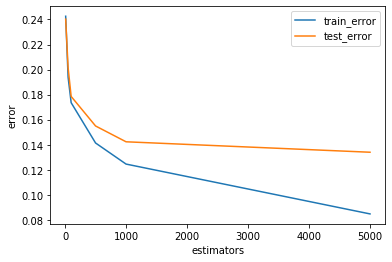

In [46]:
print("---------------------")
print("----- ADA BOOST -----")
print("---------------------\n")

train_error = []
test_error = []
estimators = [10, 50, 100, 500, 1000, 5000]

for estimator in estimators:
    
    start_time = time.time()
    
    print("Estimators: {}".format(estimator))
    ada = AdaBoostClassifier(n_estimators=estimator)
    ada.fit(X_train, y_train)
    
    # METRIC REPORTING
    
    # ON TRAIN
    print("\nFor Training Set:")
    predict_label = ada.predict(X_train)

    c_matrix = confusion_matrix(y_train, predict_label)

    tp = c_matrix[1][1]
    fp = c_matrix[0][1]
    tn = c_matrix[0][0]
    fn = c_matrix[1][0]

    # metric calculation
    accuracy = (tp + tn) / len(predict_label)
    error = 1-accuracy
    precision = (tp) / (tp + fp)
    recall = (tp) / (tp + fn)
    # avoid a division by 0 error
    if precision+recall > 0:
        f1 = 2 * (precision*recall) / (precision+recall)
    else:
        f1 = 0
        
    print("\nThe accuracy is: {}".format(accuracy))
    print("The error is: {}".format(error))
    print("The precision is: {}".format(precision))
    print("The recall is: {}".format(recall))
    print("The F1 score is: {}".format(f1))
    
    train_error.append(error)
    
    
    # ON TEST
    print("\nFor Testing Set:")
    predict_label = ada.predict(X_test)

    c_matrix = confusion_matrix(y_test, predict_label)

    tp = c_matrix[1][1]
    fp = c_matrix[0][1]
    tn = c_matrix[0][0]
    fn = c_matrix[1][0]

    # metric calculation
    accuracy = (tp + tn) / len(predict_label)
    error = 1-accuracy
    precision = (tp) / (tp + fp)
    recall = (tp) / (tp + fn)
    # avoid a division by 0 error
    if precision+recall > 0:
        f1 = 2 * (precision*recall) / (precision+recall)
    else:
        f1 = 0
        
    print("\nThe accuracy is: {}".format(accuracy))
    print("The error is: {}".format(error))
    print("The precision is: {}".format(precision))
    print("The recall is: {}".format(recall))
    print("The F1 score is: {}\n".format(f1))
    
    test_error.append(error)
    
    elapsed_time = (time.time() - start_time)

    print("The time it took to run {} estimators was {} seconds\n".format(estimator, elapsed_time))
    

# GRAPHING ERROR
    
df = pd.DataFrame({'train_error':pd.Series(train_error), 
                   'test_error':pd.Series(test_error),
                   'estimators':pd.Series(estimators)})

plt.plot('estimators','train_error', data=df, label='train_error')
plt.plot('estimators','test_error', data=df, label='test_error')
plt.xlabel('estimators')
plt.ylabel('error')
plt.legend()

# Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [70]:
features = StandardScaler().fit_transform(features.values)

In [71]:
classifier = LogisticRegression(max_iter= 10000)
accuracies = cross_val_score(estimator=classifier, X=features, y=target, cv=5)
print('Logistic Regression')
print(np.mean(accuracies))

Logistic Regression
0.7009535160905841


In [72]:
classifier = LinearDiscriminantAnalysis()
accuracies = cross_val_score(estimator=classifier, X=features, y=target, cv=5)
print('LDA')
print(np.mean(accuracies))

LDA
0.699165673420739


In [73]:
classifier =  KNeighborsClassifier(n_neighbors = 8)
accuracies = cross_val_score(estimator=classifier, X=features, y=target, cv=5)
print('KNN')
print(np.mean(accuracies))

KNN
0.5715137067938021


In [74]:
classifier =  GaussianNB()
accuracies = cross_val_score(estimator=classifier, X=features, y=target, cv=5)
print('Naive Bayes')
print(np.mean(accuracies))

Naive Bayes
0.6864123957091774


In [75]:
classifier =  DecisionTreeClassifier()
accuracies = cross_val_score(estimator=classifier, X=features, y=target, cv=5)
print('Decision Tree')
print(np.mean(accuracies))

Decision Tree
0.6576877234803337


In [76]:
classifier =  RandomForestClassifier(n_estimators=100)
accuracies = cross_val_score(estimator=classifier, X=features, y=target, cv=5)
print('Random Forest Classifier')
print(np.mean(accuracies))

Random Forest Classifier
0.634207389749702


In [77]:
classifier =  AdaBoostClassifier(n_estimators=100)
accuracies = cross_val_score(estimator=classifier, X=features, y=target, cv=5)
print('ADA Boost')
print(np.mean(accuracies))

ADA Boost
0.679916567342074


# GridSearch CV

In [33]:
xfrom sklearn.model_selection import GridSearchCV

In [34]:
def dtc_grid_search(X,y,nfolds):
    # validation parameters
    param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(1, 30)}
    
    # decision tree model
    dtc = DecisionTreeClassifier()
    
    #use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtc, param_grid, cv=nfolds)
    
    #fit model to data
    dtree_gscv.fit(X, y)
    
    return dtree_gscv.best_params_

In [62]:
dtc_grid_search(features,target,5)

{'criterion': 'entropy', 'max_depth': 29}

In [40]:
dtc_grid_search(features,target,10)

{'criterion': 'entropy', 'max_depth': 29}